# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Final Project Report

* Class: DS 5100
* Student Name: Hang Yu
* Student Net ID: zdd3ga
* This URL: a URL to the notebook source of this document

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/HankElmhurst/DS5100_Final_Project/tree/main

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import numpy as np
import pandas as pd
import random

class Die:
    """
    A Die has faces and associated weights, and can be rolled to select a face.
    Faces must be unique. Weights default to 1.0 and can be updated.
    """

    def __init__(self, faces):
        """
        Initializes the Die object with faces and equal weights.

        Args:
            faces (np.ndarray): A NumPy array of unique face values (strings or numbers).

        Raises:
            TypeError: If faces is not a NumPy array.
            ValueError: If face values are not unique.
        """
        if not isinstance(faces, np.ndarray):
            raise TypeError("Faces must be provided as a NumPy array.")
        if len(np.unique(faces)) != len(faces):
            raise ValueError("Face values must be unique.")

        self._df = pd.DataFrame({"weight": np.ones(len(faces))}, index=faces)

    def change_weight(self, face, new_weight):
        """
        Change the weight for a given face.

        Args:
            face: The face value whose weight is to be changed.
            new_weight: A numeric value (int or float) for the new weight.

        Raises:
            IndexError: If face is not in the die.
            TypeError: If new_weight is not numeric or castable as float.
        """
        if face not in self._df.index:
            raise IndexError("Face not found in the die.")
        try:
            self._df.loc[face, "weight"] = float(new_weight)
        except ValueError:
            raise TypeError("Weight must be numeric or castable to float.")

    def roll(self, n_rolls=1):
        """
        Roll the die a number of times.

        Args:
            n_rolls (int): Number of times to roll. Defaults to 1.

        Returns:
            list: List of outcomes.
        """
        return random.choices(
            population=self._df.index.tolist(),
            weights=self._df["weight"].tolist(),
            k=n_rolls
        )

    def show(self):
        """
        Show current die faces and weights.

        Returns:
            pd.DataFrame: A copy of the die's internal state.
        """
        return self._df.copy()


import pandas as pd
from die import Die

class Game:
    """
    A Game object consists of rolling one or more Die objects a given number of times.
    Stores only the result of the most recent play.
    """

    def __init__(self, dice):
        """
        Initializes a Game with a list of similar Die objects.

        Args:
            dice (list): A list of Die objects.
        """
        self.dice = dice
        self._play_df = pd.DataFrame()

    def play(self, num_rolls):
        """
        Rolls the dice a given number of times and stores the result.

        Args:
            num_rolls (int): Number of times to roll the dice.
        """
        results = {i: die.roll(num_rolls) 
                   for i, die in enumerate(self.dice)}
        self._play_df = pd.DataFrame(results)
        self._play_df.index.name = 'Roll'

    def show_results(self, form='wide'):
        """
        Returns the results of the most recent play.

        Args:
            form (str): Either 'wide' (default) or 'narrow'.

        Returns:
            pd.DataFrame: Results in the specified format.

        Raises:
            ValueError: If form is not 'wide' or 'narrow'.
        """
        if form == 'wide':
            return self._play_df.copy()
        elif form == 'narrow':
            return self._play_df.stack().to_frame('Face')
        else:
            raise ValueError("Form must be 'wide' or 'narrow'.")


import pandas as pd
from game import Game

class Analyzer:
    """
    Analyzer performs statistical analysis on a Game object's most recent play.
    """

    def __init__(self, game):
        """
        Initializes the Analyzer with a Game object.

        Args:
            game (Game): A Game instance.

        Raises:
            ValueError: If input is not a Game instance.
        """
        if not isinstance(game, Game):
            raise ValueError("Input must be a Game object.")

        self.game = game

    def jackpot(self):
        """
        Counts how many times all dice rolled the same face.

        Returns:
            int: Number of jackpots.
        """
        df = self.game.show_results()
        # counts the unique face value(s) in each turn of the roll
        return (df.nunique(axis=1) == 1).sum()

    def face_counts_per_roll(self):
        """
        Counts occurrences of each face per roll.

        Returns:
            pd.DataFrame: Roll index, face columns, count values.
        """
        df = self.game.show_results()
        return df.apply(lambda row: row.value_counts(), axis=1).fillna(0).astype(int)

    def combo_count(self):
        """
        Counts order-independent combinations and their frequencies.

        Returns:
            pd.DataFrame: MultiIndex of combinations with count.
        """
        df = self.game.show_results()
        combos = df.apply(lambda row: tuple(sorted(row)), axis=1)
        combo_counts = combos.value_counts().to_frame('Count')
        combo_counts.index.name = 'Combination'
        return combo_counts

    def permutation_count(self):
        """
        Counts order-dependent permutations and their frequencies.

        Returns:
            pd.DataFrame: MultiIndex of permutations with count.
        """
        df = self.game.show_results()
        perms = df.apply(lambda row: tuple(row), axis=1)
        perm_counts = perms.value_counts().to_frame('Count')
        perm_counts.index.name = 'Permutation'
        return perm_counts
```


## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
import unittest
import numpy as np
import pandas as pd
from die import Die

class TestDie(unittest.TestCase):
    def setUp(self):
        self.faces = np.array([1, 2, 3])
        self.die = Die(self.faces)

    def test_init_requires_numpy_array(self):
        with self.assertRaises(TypeError):
            Die([1, 2, 3])  # not a numpy array

    def test_init_requires_distinct_faces(self):
        with self.assertRaises(ValueError):
            Die(np.array([1, 1, 2]))  # duplicates

    def test_default_weights(self):
        df = self.die.show()
        self.assertTrue((df['weight'] == 1.0).all())

    def test_change_weight_invalid_face(self):
        with self.assertRaises(IndexError):
            self.die.change_weight(999, 2.0)

    def test_change_weight_invalid_weight_type(self):
        with self.assertRaises(TypeError):
            self.die.change_weight(1, "invalid")

    def test_roll_returns_list_of_correct_length(self):
        result = self.die.roll(5)
        self.assertIsInstance(result, list)
        self.assertEqual(len(result), 5)

    def test_show_returns_copy(self):
        df1 = self.die.show()
        df2 = self.die.show()
        df1.iloc[0,0] = None
        self.assertNotEqual(df1.iloc[0,0], df2.iloc[0,0])

if __name__ == '

import unittest
import numpy as np
import pandas as pd
from die import Die
from game import Game

class TestGame(unittest.TestCase):
    def setUp(self):
        faces = np.array(['A','B'])
        d1 = Die(faces)
        d2 = Die(faces)
        self.game = Game([d1, d2])

    def test_play_and_show_wide(self):
        self.game.play(3)
        df = self.game.show_results()
        self.assertEqual(df.shape, (3, 2))

    def test_show_narrow_format(self):
        self.game.play(3)
        df = self.game.show_results(form='narrow')
        self.assertIsInstance(df, pd.DataFrame)
        self.assertIsInstance(df.index, pd.MultiIndex)
        self.assertEqual(df.shape[1], 1)

    def test_show_invalid_format_raises(self):
        self.game.play(1)
        with self.assertRaises(ValueError):
            self.game.show_results(form='invalid')

if __name__ == '__main__':

import unittest
import numpy as np
import pandas as pd
from die import Die
from game import Game
from analyzer import Analyzer

class TestAnalyzer(unittest.TestCase):
    def setUp(self):
        faces = np.array([1,2,3])
        dice = [Die(faces) for _ in range(3)]
        self.game = Game(dice)
        self.game.play(5)
        self.analyzer = Analyzer(self.game)

    def test_init_requires_game_object(self):
        with self.assertRaises(ValueError):
            Analyzer("not a game")

    def test_jackpot_count(self):
        # force two jackpots
        self.analyzer.game._play_df = pd.DataFrame({ 
            0:[1,1], 
            1:[1,1], 
            2:[1,1] 
            }, index=[0,1])
        self.assertEqual(self.analyzer.jackpot(), 2)

    def test_face_counts_per_roll_structure(self):
        df = self.analyzer.face_counts_per_roll()
        self.assertIsInstance(df, pd.DataFrame)
        # columns should match the full set of possible faces
        expected_faces = sorted(self.analyzer.game.dice[0].
                                show()     # get the full set of faces via Die.show()
                                .index.tolist())
        self.assertListEqual(sorted(df.columns.tolist()), expected_faces)

    def test_combo_count_returns_dataframe(self):
        df = self.analyzer.combo_count()
        self.assertIsInstance(df, pd.DataFrame)
        self.assertIn('Count', df.columns)

    def test_permutation_count_returns_dataframe(self):
        df = self.analyzer.permutation_count()
        self.assertIsInstance(df, pd.DataFrame)
        self.assertIn('Count', df.columns)

if __name__ == '__main__':
    unittest.main(verbosity=2)     unittest.main(verbosity=2)    __main__':
    unittest.main(verbosity=2)

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [12]:
# e.g. import montecarlo.montecarlo 
from die import Die
from game import Game
from analyzer import Analyzer

print("Die, Game, and Analyzer imported successfully:", Die, Game, Analyzer)

Die, Game, and Analyzer imported successfully: <class 'die.Die'> <class 'game.Game'> <class 'analyzer.Analyzer'>


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [14]:
# help(montecarlo)
help(Die)
help(Game)
help(Analyzer)

Help on class Die in module die:

class Die(builtins.object)
 |  Die(faces)
 |
 |  A Die has faces and associated weights, and can be rolled to select a face.
 |  Faces must be unique. Weights default to 1.0 and can be updated.
 |
 |  Methods defined here:
 |
 |  __init__(self, faces)
 |      Initializes the Die object with faces and equal weights.
 |
 |      Args:
 |          faces (np.ndarray): A NumPy array of unique face values (strings or numbers).
 |
 |      Raises:
 |          TypeError: If faces is not a NumPy array.
 |          ValueError: If face values are not unique.
 |
 |  change_weight(self, face, new_weight)
 |      Change the weight for a given face.
 |
 |      Args:
 |          face: The face value whose weight is to be changed.
 |          new_weight: A numeric value (int or float) for the new weight.
 |
 |      Raises:
 |          IndexError: If face is not in the die.
 |          TypeError: If new_weight is not numeric or castable as float.
 |
 |  roll(self, n_rolls

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [20]:
# Create a fair coin and an unfair coin
import numpy as np
from die import Die

faces = np.array(['H', 'T'])
fair_coin   = Die(faces)
unfair_coin = Die(faces)
unfair_coin.change_weight('H', 5)    # make 'H' five times more likely than 'T'

print("Fair coin:")
print(fair_coin.show(), "\n")
print("Unfair coin:")
print(unfair_coin.show())

Fair coin:
   weight
H     1.0
T     1.0 

Unfair coin:
   weight
H     5.0
T     1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correctly and without error (1).

In [22]:
# Play a game of 1000 flips with two fair coins
from game import Game

game_fair = Game([fair_coin, Die(faces)])   # two fresh fair coins
game_fair.play(1000)
print("Played 1000 flips with two fair coins—no errors.")

Played 1000 flips with two fair coins—no errors.


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correctly and without error (1).

In [24]:
# Play another game of 1000 flips with two unfair coins and one fair coin
game_unfair = Game([unfair_coin, unfair_coin, fair_coin])
game_unfair.play(1000)
print("Played 1000 flips with two unfair coins & one fair coin—no errors.")

Played 1000 flips with two unfair coins & one fair coin—no errors.


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objects instantiated for both games (1).
- Raw frequencies reported for both (1).

In [57]:
# Use Analyzer to get raw jackpot counts for both games
from analyzer import Analyzer

ana_fair   = Analyzer(game_fair)
ana_unfair = Analyzer(game_unfair)

raw_fair   = ana_fair.jackpot()
raw_unfair = ana_unfair.jackpot()

print("Raw jackpots (fair):", raw_fair)
print("Raw jackpots (unfair):", raw_unfair)

Raw jackpots (fair): 509
Raw jackpots (unfair): 362


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [59]:
# Compute relative frequencies (jackpots ÷ total rolls)
relative_fair   = raw_fair   / 1000
relative_unfair = raw_unfair / 1000

print("Relative jackpot freq (fair):",   relative_fair)
print("Relative jackpot freq (unfair):", relative_unfair)

Relative jackpot freq (fair): 0.509
Relative jackpot freq (unfair): 0.362


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

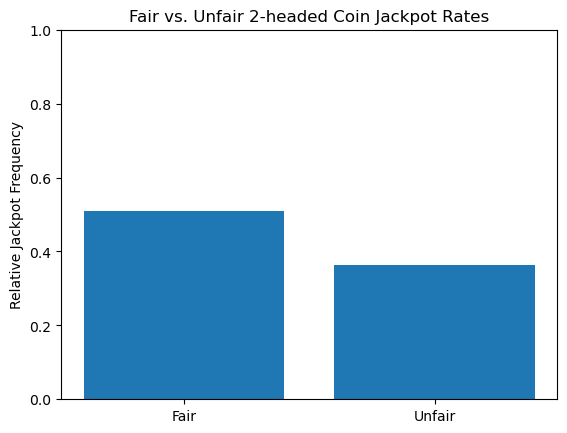

In [61]:
# Bar chart comparing the two relative frequencies
import matplotlib.pyplot as plt

labels = ['Fair', 'Unfair']
values = [relative_fair, relative_unfair]

plt.bar(labels, values)
plt.ylabel('Relative Jackpot Frequency')
plt.title('Fair vs. Unfair 2-headed Coin Jackpot Rates')
plt.ylim(0, 1)
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [67]:
# Task: Create three standard 6-faced dice
import numpy as np
from die import Die

faces6 = np.array([1, 2, 3, 4, 5, 6])
d1 = Die(faces6)
d2 = Die(faces6)
d3 = Die(faces6)

print("d1 weights:\n", d1.show(), "\n")
print("d2 weights:\n", d2.show(), "\n")
print("d3 weights:\n", d3.show())

d1 weights:
    weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0 

d2 weights:
    weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0 

d3 weights:
    weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [69]:
# Task: Make d2 unfair by weighting face 6 five times more
d2.change_weight(6, 5)
print("After weighting d2:\n", d2.show())

After weighting d2:
    weight
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [71]:
# Task: Make d3 unfair by weighting face 1 five times more
d3.change_weight(1, 5)
print("After weighting d3:\n", d3.show())

After weighting d3:
    weight
1     5.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [89]:
# Task: Play 10000 rolls with five fair dice
from game import Game

game_fair5 = Game([Die(faces6), Die(faces6), Die(faces6), Die(faces6), Die(faces6)])
game_fair5.play(10000)
print("Played 1000 rolls with five fair dice — no errors.")
print(game_fair5.show_results().head(), "\n")

Played 1000 rolls with five fair dice — no errors.
      0  1  2  3  4
Roll               
0     3  1  2  6  6
1     1  6  6  6  6
2     5  5  2  4  5
3     4  2  3  5  1
4     1  5  5  6  5 



Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [91]:
# Task: Play 10000 rolls with two unfair dice, as defined in Step #2 and Step #3
from game import Game

game_unfair5 = Game([Die(faces6), Die(faces6), Die(faces6), d2, d3])
game_unfair5.play(10000)
print("Played 1000 rolls with three fair dice and two unfair dice — no errors.")
print(game_fair5.show_results().head(), "\n")

Played 1000 rolls with three fair dice and two unfair dice — no errors.
      0  1  2  3  4
Roll               
0     3  1  2  6  6
1     1  6  6  6  6
2     5  5  2  4  5
3     4  2  3  5  1
4     1  5  5  6  5 



Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

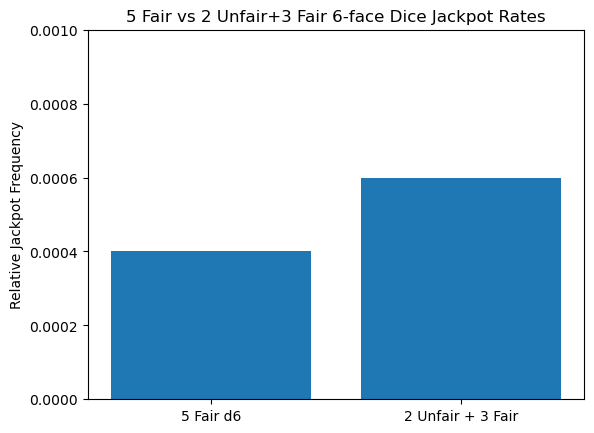

In [99]:
from analyzer import Analyzer
import matplotlib.pyplot as plt

# Instantiate analyzers
ana_fair5   = Analyzer(game_fair5)
ana_unfair5 = Analyzer(game_unfair5)

# Compute relative jackpot frequencies
rel_fair5   = ana_fair5.jackpot() / 10000
rel_unfair5 = ana_unfair5.jackpot() / 10000

# Plot comparison
plt.bar(
    ['5 Fair d6', '2 Unfair + 3 Fair'],
    [rel_fair5, rel_unfair5]
)
plt.ylabel('Relative Jackpot Frequency')
plt.title('5 Fair vs 2 Unfair+3 Fair 6-face Dice Jackpot Rates')
plt.ylim(0, 0.001)
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [105]:
import pandas as pd
import numpy as np
from die import Die
from game import Game
from analyzer import Analyzer

# Create an abstract “letter” die weighted by raw English‐letter frequencies
freq_df = pd.read_csv('english_letters.txt', sep=r'\s+', header=None, names=['Letter','Freq'])
letters = freq_df['Letter'].to_numpy()
d_letters = Die(letters)
for letter, freq in zip(freq_df['Letter'], freq_df['Freq']):
    d_letters.change_weight(letter, freq)

print("Letter‐die (first few faces & weights):")
print(d_letters.show().head(), "\n")

Letter‐die (first few faces & weights):
        weight
E  529117365.0
T  390965105.0
A  374061888.0
O  326627740.0
I  320410057.0 



Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [107]:
# Play a game with 4 dices created in Task 1 for 1000 rolls
dice4 = []
for i in range(4):
    d = Die(letters)
    for letter, freq in zip(freq_df['Letter'], freq_df['Freq']):
        d.change_weight(letter, freq)
    dice4.append(d)

game4 = Game(dice4)
game4.play(1000)
print("Played a game with 4 letter dice for 1000 rolls. \n")

Played a game with 4 letter dice for 1000 rolls. 



Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [112]:
# Load Scrable Words into a set for lookup
with open('scrabble_words.txt') as file:
    vocabulary = {word.strip().upper() for word in file}
    
# Get the full permutation counts from the game Analyzer
analyzer4 = Analyzer(game4)
perm_df4 = analyzer4.permutation_count()

# Join each tuple into a string and test membership in vocab
perms     = [''.join(p) for p in perm_df4.index]
valid_perms = [word for word in perms if word in vocabulary]

# Report the result
count4 = len(valid_perms)
print(f"Distinct valid 4-letter words found: {count4}")

Distinct valid 4-letter words found: 57


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [116]:
# Play a game with 5 dices created in Task 1 for 1000 rolls
dice5 = []
for i in range(5):
    d = Die(letters)
    for letter, freq in zip(freq_df['Letter'], freq_df['Freq']):
        d.change_weight(letter, freq)
    dice5.append(d)

game5 = Game(dice5)
game5.play(1000)
print("Played a game with 5 letter dice for 1000 rolls. \n")

# Load Scrable Words into a set for lookup
with open('scrabble_words.txt') as file:
    vocabulary = {word.strip().upper() for word in file}
    
# Get the full permutation counts from the game Analyzer
analyzer5 = Analyzer(game5)
perm_df5 = analyzer5.permutation_count()

# Join each tuple into a string and test membership in vocab
perms     = [''.join(p) for p in perm_df5.index]
valid_perms = [word for word in perms if word in vocabulary]

# Report the result
count5 = len(valid_perms)
print(f"Distinct valid 5-letter words found: {count5}")

Played a game with 5 letter dice for 1000 rolls. 

Distinct valid 5-letter words found: 5
